In [ ]:
!pip install datasets

from IPython.display import clear_output
from datasets import load_dataset
import tensorflow as tf
import time
clear_output()  # Clears the output

In [ ]:
# @title Run me to mount drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

path='/content/drive/MyDrive/A&T_workshop/data'

import sys

sys.path.append(path)
import os
os.chdir(path)
!pwd

Mounted at /content/drive/
/content/drive/MyDrive/A&T_workshop/data


### **Lab Are you ready to build your own Small Language Model?** - To comment - **Jonathan** 4 revised activities - *Annie (if time)**

1.12 Coding Activity -  Load the dataset

**Dataset**

For this activity, we will use the [tiny stories dataset](https://arxiv.org/pdf/2305.07759) (TinyStories), a synthetic dataset of short stories in English that only contain words that a typical 3 to 4-year-olds usually understand, generated by a Large Language Model (GPT-3.5 and GPT-4). TinyStories can be used to train and evaluate language models that are much smaller (below 10 million total parameters), or have much simpler architectures (with only one transformer block), yet still produce fluent and consistent stories with several paragraphs that are diverse and have almost perfect grammar.

**Step 1: Load the Dataset**


To load the dataset, we'll leverage the [huggingface datasets](https://huggingface.co/docs/datasets/en/index) package.

This dataset contains over 2 million short stories. Depending on your hardware and available compute resources, training on the entire dataset might not be feasible. Therefore, you can choose a subset of stories to train with based on your resources.

In [ ]:
import pandas as pd

stories_data=pd.read_json('africa_galore.json')

# qa_dataset = load_dataset("Svngoku/Global-African-History-QA", split="train")
# qa_df = pd.DataFrame(qa_dataset['answer'], columns=["description"])

# stories=pd.concat([stories_data['description'],qa_df]).reset_index()
# stories=stories['description']
train_dataset = stories_data['description']
print(train_dataset.shape)

(239,)


In [ ]:
# tiny_stories_dataset = load_dataset("roneneldan/TinyStories", split="train")
# clear_output() # clears the output

# # print(f"Number of stories in the TinyStories train dataset: {tiny_stories_dataset.num_rows}")

# # The dataset contains over 2 million short children stories
# stories = tiny_stories_dataset['text']

# number_of_stories_for_training = 1000 #@param {type: "number"}
# train_dataset = stories[:number_of_stories_for_training]

# print(f"Number of stories in the TinyStories train dataset we will be using for training: {len(train_dataset)}")


In [ ]:
# Let's look at the first story
print(train_dataset[0])

Didier Drogba, a name that resonates with football fans worldwide, is an Ivorian legend who transcended the sport to become a symbol of hope and unity for his nation. His powerful presence on the pitch, his clinical finishing, and his ability to rise to the occasion made him one of the most feared strikers of his generation.  Drogba's impact extended beyond club football.  He captained the Ivory Coast national team, leading them to multiple World Cup appearances and becoming their all-time leading scorer.  His influence helped bring a period of peace to his war-torn country, demonstrating the unifying power of sport.  More than just a footballer, Drogba is a humanitarian and a national icon, revered for his contributions both on and off the field.


**Step 2 - Convert the Text Sequence to Tokens**

In this step, we'll focus on "tokenization", which is the process of converting a sequence of text into smaller, manageable units known as *tokens*. For our purposes, we will be tokenizing the text sequence into **individual words**. This is a common approach when building a word-level Transformer model.

**Why word-level?**
Word-level tokenization is one of the simplest forms of tokenization, and it works well for many tasks. It treats each word as a unit of meaning, which is useful when the model learns associations between specific words. In the next module, you'll explore other tokenization strategies, such as Subword tokenization (useful for handling rare words or languages with complex word structures) and Character-level tokenization (treating each character as a token, which is useful for languages with rich morphology or to handle unknown words).

Let's use the function we developed in last section to split the text sequence into word tokens. It splits words on space so when you tokenize a sentence like "Bimpe didn't come home yesterday." you'll get a list of tokens like ["Bimpe", "didn't", "come", "home", "yesterday."].

*Run the cell below*

In [ ]:
#Write a function to split text into words
def split_text(text: str)-> list[str]:
  # your code here
  # split text on whitespace
  words = ... # update me
  return words

In [ ]:
# @title Run me to test your code
# def test_split_text():
#   hint = """
#         Hints:
#         ======
#         split a text to list of words. for example "hello world" become ['hello', 'world'] where we have splitted on whitespace.
#         There is a Python `split` function you can use.
#     """

#   if split_text('hello world') == ['hello', 'world']:
#     print("Nice! Your answer looks correct.")
#   else:
#     print("\033[1m\033[91mSorry, your answer is not correct.\033[0m")
#     give_hints = input("Would you like some hints? type yes or no ")
#     if give_hints.lower() in ['yes', "y"]:
#       print(f"{hint}")


# test_split_text()
# assert split_text('hello world') == ['hello', 'world'], '`split_text` function is not implemented correctly. Try again.'

In [ ]:
# @title split_text function solution (Try not to peek until you've given it a good try!')
def split_text(text: str)-> list[str]:
  words = text.split(" ") # split text on whitespace
  return words


In [ ]:
words = [word for story in train_dataset for word in split_text(story)]
print("Total number of words in our train dataset:",len(words))

Total number of words in our train dataset: 20063


In [ ]:
words[:20] #print out the first 20 words

['Didier',
 'Drogba,',
 'a',
 'name',
 'that',
 'resonates',
 'with',
 'football',
 'fans',
 'worldwide,',
 'is',
 'an',
 'Ivorian',
 'legend',
 'who',
 'transcended',
 'the',
 'sport',
 'to',
 'become']

**Step 3: Create a Vocabulary Comprising of Unique Words**

Vocabulary is the set of unique words that the model recognizes and processes during training and inference. These words are the building blocks the model uses to understand and generate text data. The vocabulary defines what the model "knows" in terms of language input and output.

In [ ]:
def get_vocab(words: list[str])-> list[str]:
  # your code here
  # create a vocabulary list from the set of words
  vocab = ... # update me
  return vocab

In [ ]:
# @title Run me to test your code
# def test_get_vocab():
#   hint = """
#         Hints:
#         ======
#         1. Create a unique set of words e.g, if you have ['hello', 'world', 'world'], it becomes {'hello', 'world'}. There is a Python `set` function you can use.
#         2. Convert the set to list e.g {'hello', 'world'} becomes ['hello', 'world']. There is a Python `list` function you can use.
#     """

#   if get_vocab(['hello', 'world', 'world']) == ['hello', 'world']:
#     print("Nice! Your answer looks correct.")
#   elif type(get_vocab(['hello', 'world', 'world'])) == set:
#     print("\033[1m\033[91mSorry, your answer is not correct. Make sure you return a list, not a set.\033[0m")
#     give_hints = input("Would you like some hints? type yes or no ")
#     if give_hints.lower() in ['yes', "y"]:
#       print(f"{hint}")
#   else:
#     print("\033[1m\033[91mSorry, your answer is not correct.\033[0m")
#     give_hints = input("Would you like some hints? type [yes or no] ")
#     if give_hints.lower() in ['yes', "y"]:
#       print(f"{hint}")

# test_get_vocab()
# assert get_vocab(['hello', 'world', 'world']) == ['hello', 'world'], '`get_vocab` function is not implemented correctly. Try again.'

In [ ]:
# @title get_vocab function solution (Try not to peek until you've given it a good try!')
def get_vocab(words: list[str])-> list[str]:
  # your code here
  # create a vocabulary list from the set of words
  vocab = list(set(words)) # update me
  return vocab

In [ ]:
vocab = get_vocab(words)
vocab_size = len(vocab) # Size of the vocabulary (number of unique words).
print(vocab_size)

5450


In [ ]:
vocab[:10] # the first 10 words in the vocabulary

['',
 'savannas',
 'melodies,',
 'monumental',
 'allow',
 'healer',
 'Prize,',
 'soups',
 'stories.',
 'throng,']

**Step 4: Add Special Unknown Token to the Vocabulary to Handle Unseen Words**

In natural language processing, it's common for a model to encounter unseen words—words that didn't appear in the training dataset. To handle this, we introduce a special token called the unknown token `<UNK>`. This token allows the model to effectively manage words that are not in its vocabulary.

The `<UNK>` token serves as a placeholder for words that the model has not seen during training. When the model encounters an unseen word, it will replace it with `<UNK>`. This helps the model handle out-of-vocabulary (OOV) words, ensuring that it can still generate reasonable outputs even if it hasn't learned the specific word.

For example, if your vocabulary includes words like "apple", "dog", and "car", but you encounter a compound word like "keke-marwa" that the model hasn't seen before, it will substitute "keke-marwa" with `<UNK>`.

Below we add the unknown token `<UNK>` to our list of unique words, which is currently represented by the variable, vocab

In [ ]:
UNKNOWN_TOKEN = '<UNK>'
vocab = vocab +  [UNKNOWN_TOKEN]
vocab_size = len(vocab) # update the vocab size
print(vocab_size)

5451


The size of our vocabulary has increased by 1.

Let's print out the last 10 words in our vocabulary

In [ ]:
vocab[-10:]

['coals,',
 'bar',
 'rapidly,',
 'anticipation.',
 'lush',
 'streets,',
 'importance',
 'where',
 'aroma.',
 '<UNK>']

We now see the special unknown token `<UNK>` on the very bottom.

**Step 5: Convert the Word Tokens into Numerical Representation**

Since computers work with numbers, we need to convert words into numerical representations. This allows the model to process and understand the text data. This steps is also referred to as "vectorization".

To achieve this, we'll assign a **numerical value** (or **index**) to each word in the vocabulary.

We'll create two dictionaries to facilitate this mapping:

1. **`index_to_word`**: This dictionary maps an index (a number) back to its corresponding word. Given an index between 0 and the vocabulary size, it returns the word at that position.
2. **`word_to_index`**: This dictionary maps each word in the vocabulary to its corresponding numerical value (index). It returns the index for a given word.

Now, whenever we need to convert a word to a number, we use `word_to_index`, and when we need to convert a number back to a word, we use `index_to_word` which you'll write.


In [ ]:
# Note the index here is starting with 1.
# We are reserving the first index for another special token <PAD> explained below.
word_to_index = {word: index+1 for index, word in enumerate(vocab)}

# your code here
# create a dictionary that maps an index (a number) back to its corresponding word in the vocab, starting the index with 1.
index_to_word = ... # update me

In [ ]:
# lets get the indices for the special unknown '<UNK>' token
word_to_index[UNKNOWN_TOKEN]

5451

In [ ]:
# @title index_to_word solution (Try not to peek until you've given it a good try!')
index_to_word = {index+1: word for index, word in enumerate(vocab)}

In [ ]:
index_to_word[word_to_index[UNKNOWN_TOKEN]]

'<UNK>'

**Encoding and Decoding function**

We will create two functions: `encoding` and `decoding`.
- The `encoding` function takes a word from the vocabulary and returns its corresponding index. Whenever it encounters a word not in the vocab, it will return the index of the `<UNK>` token.
- The `decoding` function, will take an index and return the token (word) associated with it.


In [ ]:
def encoding(word: str) -> int:
  return word_to_index.get(word, word_to_index[UNKNOWN_TOKEN])

def decoding(number: int) -> str:
  return index_to_word.get(number, UNKNOWN_TOKEN)

Now, let's encode all the words i.e convert all the words to number using our `encoding` function.

In [ ]:
encoded_words = [ [encoding(word) for word in split_text(story)] for story in train_dataset ]
encoded_words[0][:10] # print the first 10 encoded words in the first story

[4124, 1941, 4691, 4456, 5199, 1169, 4636, 712, 4947, 5396]

In [ ]:
#let's check if everything is as we expect
print("word | encoding | decoding")
print("---- | -------- | --------")
for word, index in zip(words[:10], encoded_words[0][:10]):
  print(f"'{word}' |  {index} | '{decoding(index)}'")

word | encoding | decoding
---- | -------- | --------
'Didier' |  4124 | 'Didier'
'Drogba,' |  1941 | 'Drogba,'
'a' |  4691 | 'a'
'name' |  4456 | 'name'
'that' |  5199 | 'that'
'resonates' |  1169 | 'resonates'
'with' |  4636 | 'with'
'football' |  712 | 'football'
'fans' |  4947 | 'fans'
'worldwide,' |  5396 | 'worldwide,'


The `encoding` and the `decoding` are the same for the words that are in the vocab.

**Convert the list of encoded_words to Tensor array**

Tensors are multi-dimensional arrays optimized for use in deep learning frameworks such as Jax, Keras, PyTorch and TensorFlow. Tensors allow for efficient mathematical operations and are a standard input format for machine learning models.

In [ ]:
# encoded_tensor = tf.convert_to_tensor(encoded_words, dtype=tf.int32)

What just happened? The above cell threw a `ValueError`, saying "can't convert non-rectangular Python sequence to Tensor." What does this mean?

This error occurs because TensorFlow requires that the lists (or sequences) you're trying to convert into a tensor have the same size—i.e., they must form a **rectangular** shape. In simpler terms, the inner lists must have equal lengths to be converted into a tensor.

Let's consider this example: `[[1, 2, 3], [1, 2]]`


If we try to convert this to a tensor, we will encounter an error because the two inner lists have different lengths. To resolve this, we need to ensure that all the lists have the same size. We can achieve this in two ways:

1. **Padding**: We can add "dummy" values (like `-1`, `0`, etc.) to the shorter list to make it the same length as the longer one. For example: `[[1, 2, 3], [1, 2, 0]]`

   In this case, we added `0` to the second list as a placeholder, assuming that `0` is not part of the meaningful data.

2. **Truncation**: Alternatively, we can shorten the longer list to match the length of the shorter one. For example: `[[1, 2], [1, 2]]`

   Here, we truncated the first list to match the length of the second list.

This leads us to the concept of **padding**, which ensures that all sequences have the same length, allowing them to be converted into a uniform tensor. Let's explore padding in more detail below.

**Step 6a: Add Special Padding Token to Handle Varying Input Lengths**

The **padding** process ensures that sequences of varying lengths are all the same size. This is done by adding special token `<PAD>` to shorter sequences so that they align with the longest sequence in the dataset. Padding is necessary to create consistent input for the model (i.e input of the same shape).



Before we pad the token, we first need to update our vocabulary to include the special pad token `<PAD>`. We will add it to the top of our vocab so it's index will be `0`

In [ ]:
PAD_TOKEN = '<PAD>'
vocab =  [PAD_TOKEN] + vocab
vocab_size = len(vocab) # update the vocab size
print(vocab_size)

5452


In [ ]:
vocab[:10] # print the first 10 words

['<PAD>',
 '',
 'savannas',
 'melodies,',
 'monumental',
 'allow',
 'healer',
 'Prize,',
 'soups',
 'stories.']

We also need to update the `word_to_index` and `index_to_word` dictionaries. The pad token is generally added at the first index.

In [ ]:
index_to_word[0] = PAD_TOKEN
word_to_index[PAD_TOKEN] = 0

In [ ]:
encoding(PAD_TOKEN)

0

Before we go ahead to pad our sequences. Let's create a handy Python class that puts together everything we've just learned about tokenizing the text data and encoding into numbers. We will call this class SimpleWordTokenizer. In course 2, we will introduce other types of tokenization which follow similar structure as our `SimpleWordTokenizer` class.

In [ ]:
# Putting it all together.
class SimpleWordTokenizer:
    """
    A simple tokenizer that converts text into sequences of
    indices based on a vocabulary.

    Args:
        texts: Input text dataset
        vocab: A pre-defined vocabulary.
    """

    def __init__(self, texts: list[str], vocab: list[str] | None = None):
        """Initializes the tokenizer with a provided vocabulary.

        Args:
            vocab: A pre-defined vocabulary.
        Tests:
        tokenizer = SimpleWordTokenizer(vocab)
        example_text = "Hello there!"
        assert tokenizer.vocab == vocab
        assert tokenizer.encode(example_text)
               == [word_to_index.get(word, 0)
               for word in split_text(example_text)]
        assert train_dataset[0][:10]
                == tokenizer.decode(tokenizer.encode(train_dataset[0][:10]))
        """
        # Tokenize the sequences into individual words

        self.unknown_token = "<UNK>"
        self.pad_token = "<PAD>"

        if vocab is None:
          if isinstance(texts, str):
            texts = [texts]
          # step 2: convert text sequence to tokens
          words = [word for text in texts for word in self.split_text(text)]

          # step 3: create a vocabulary comprising of unique words
          vocab = self.get_vocab(words)

          # step 4 and 6: add special unknown and pad token
          self.vocab = [self.pad_token] + vocab +  [self.unknown_token]
        else:
          self.vocab = vocab

        # Size of vocabulary
        self.vocab_size = len(self.vocab)

        # Create word-to-index and index-to-word mappings
        self.word_to_index = {word: index
                              for index, word in enumerate(self.vocab)}
        self.index_to_word = {index: word
                              for index, word in enumerate(self.vocab)}

        self.pad_token_id = self.encode(self.pad_token)[0]
        self.unknown_token_id = self.encode(self.unknown_token)[0]

    def split_text(self, text: str) -> list[str]:
        """Splits a given text into words."""
        return text.split(" ")

    def join_text(self, text_lists: list[str]) -> str:
        """Combines a list of words into a single string,
            with words separated by spaces.
        """
        return " ".join(text_lists)

    def get_vocab(self, words: list[str])-> list[str]:
      """Create a vocabulary list from the set of words"""
      vocab = list(set(words))
      return vocab

    def encoding(self, word: str) -> int:
      """Gets index of word if it exists, otherwise return unknown token id."""
      return self.word_to_index.get(word,
                                    self.word_to_index[self.unknown_token])

    def decoding(self, number: int) -> str:
      """Gets word associated with the index."""
      return self.index_to_word.get(number, self.unknown_token)

    def encode(self, text: str) -> list[int]:
        """Encodes a text sequence into a list of indices based on the vocabulary.

        Args:
            text: The input text to be encoded.

        Returns:
            list: A list of indices corresponding to the words in the
                  input text.
        """

        # step 5: convert word tokens into numerical representation
        encoded_words = [self.encoding(word) for word in self.split_text(text)]
        return encoded_words

    def decode(self, numbers: int | list[int]) -> str:
        """Decodes a list (or single index) of integers back into
        corresponding words from the vocabulary.

        Args:
            numbers: A single index or a list of indices to be
                     decoded into words.

        Returns:
            str: A string of decoded words corresponding to the input indices.
        """
        # If a single integer is passed, convert it into a list
        if isinstance(numbers, int):
            numbers = [numbers]

        # Map indices to words
        words = [self.decoding(number) for number in numbers]

        # Join the decoded words into a single string
        return self.join_text(words)

Let's verify that the class we created returns the same vocab as the one we made before

In [ ]:
tokenizer = SimpleWordTokenizer(train_dataset)
assert tokenizer.vocab == vocab
assert tokenizer.decode(tokenizer.encode(train_dataset[0])) == train_dataset[0]

In [ ]:
tokenizer.decode(tokenizer.encode(train_dataset[0]))

"Didier Drogba, a name that resonates with football fans worldwide, is an Ivorian legend who transcended the sport to become a symbol of hope and unity for his nation. His powerful presence on the pitch, his clinical finishing, and his ability to rise to the occasion made him one of the most feared strikers of his generation.  Drogba's impact extended beyond club football.  He captained the Ivory Coast national team, leading them to multiple World Cup appearances and becoming their all-time leading scorer.  His influence helped bring a period of peace to his war-torn country, demonstrating the unifying power of sport.  More than just a footballer, Drogba is a humanitarian and a national icon, revered for his contributions both on and off the field."

So now, we can simply use the tokenizer to encode the text data. It will perform the step 2-6a above.

In [ ]:
encoded_words = [tokenizer.encode(text) for text in train_dataset]

**Step 6b: Pad the Tokens to Desired Length**

We are now ready to pad our sequence of encoded words.

The Padding ```<PAD>``` token is used to ensure that all sequences have the same length. Our stories have varying lengths but neural networks expect inputs to have a uniform shape. So shorter stories need to be padded to match the longest stories so that all inputs to the network follow the same dimensions. The Transformer model takes in each story as it's context and learns the relationship between the tokens.

However, this method raises several questions: What exactly should be padded? Should we pad every sentence so that each one reaches the same length, or is it more effective to pad entire stories so that their overall structure remains intact? The answer largely depends on the specific modeling goal. Since the context and narrative flow of a complete story are crucial, then padding the whole story might be more beneficial to preserve that context.

Let's count the maximum and minimum number of words in a story in our dataset to determine the length we want to pad up to.

In [ ]:
story_length = [(len(story)) for story in encoded_words]
min(story_length), max(story_length)

(26, 320)

In [ ]:
print('length of first story:', len(encoded_words[0] ))
print('First 10 tokens:', encoded_words[0][:10])

length of first story: 128
First 10 tokens: [4124, 1941, 4691, 4456, 5199, 1169, 4636, 712, 4947, 5396]


So, we need to make all sequences equal length.
We can either trucate to the shortest story or add padding to make all stories match the length of the longest story. The former results in a loss of context as all stories except the last story will lose words and be truncted down. Adding extra `<PAD>` to all stories except the longest will retain context but might add a slight memory and compute overhead. You may also investigate the distribution of story lengths and find a maximum length that retains full context for most stories.

In [ ]:
import tensorflow as tf

maxlen = 312 #@param {type:"number"}

# PAD_TOKEN_ID = encoding(PAD_TOKEN)
PAD_TOKEN_ID = tokenizer.pad_token_id
longest_story_length = max(story_length)

# Ensure the maxlen is positive
assert maxlen > 0, "Max length must be greater than 0. Increase the `maxlen`"
assert maxlen <= longest_story_length, f"Note: The padding token {PAD_TOKEN_ID} will be added to sequences longer than the longest story - You probably don't want that. Reduce the `maxlen`"

# Check if the maxlen is shorter or longer than the longest story
if maxlen < longest_story_length:
    print(f"\033[33mWarning: The longest story has {longest_story_length} words, but `maxlen` is set to {maxlen}. As a result, stories longer than `maxlen` will be truncated.\033[0m")

padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(encoded_words, maxlen=maxlen, padding='pre',truncating='pre' ,value=PAD_TOKEN_ID)
print("New length of first story:",len(padded_sequences[0]),'\n')

print("Padding makes the length of all sequences the same as the specified `maxlen`")

if maxlen > len(encoded_words[0]):
  print(f"Notice the first 10 tokens observed above appear after the padded token {PAD_TOKEN_ID} \n")
  print("Padded tokens of first story:\n",padded_sequences[0])

New length of first story: 312 

Padding makes the length of all sequences the same as the specified `maxlen`
Notice the first 10 tokens observed above appear after the padded token 0 

Padded tokens of first story:
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  

In [ ]:
print("A different story looks like this after padding \n",padded_sequences[-1])

A different story looks like this after padding 
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0  

In [ ]:
padded_sequences.shape

(239, 312)

**Step 7: Prepare Input and Output**

 What are the inputs and outputs of the model and how should we feed it into the model?

Our model works autoregressively, meaning it generates tokens one by one, using previous tokens as context. This means:

The input sequence should contain tokens up to a certain point. The target sequence should be the same sequence shifted left by one token (i.e., the next word to predict).

In [ ]:
# Prepare input and output  to the transformer model:
input = padded_sequences[:, :-1] # All words except the last one
output= padded_sequences[:, 1:]  # All words except the first one

Let's print out the first input and output sentence

In [ ]:
print(input[0, -10:])
print(output[0, -10:])

[ 676 4402 1200  919  590 3157 4240 4872 2782 4353]
[4402 1200  919  590 3157 4240 4872 2782 4353 2610]


Notice how input and outputs are shifted by 1?

Let's understand the shape of input and output.


In [ ]:
output.shape

(239, 311)

This shape signifies the number of stories you selected above and the max length enforced through padding.

**Step 8: Batching**

 We have a dataset of encoded and padded stories, and we need to feed them into a model for training or inference. How should we do this?  

**Option 1: Feed Sequences One by One (Sequential Processing)**  
At first glance, we could feed each encoded sequence into the model one at a time. This means that for every sequence the model makes a prediction, gets some feedback on whether the prediction is correct or not (remember the concept of loss?), and uses that feedback to correct its understanding.  

*Why is this inefficient?*
- Neural networks perform matrix operations, which are highly optimized for parallel computation on GPUs/TPUs. If we process one sequence at a time, we waste the parallel processing capability of our hardware.  
- Training would take an extremely long time because the model updates its beliefs after each single sequence instead of aggregating information across multiple sequence.    

**Option 2: Feed All Sequences Together (One Giant Input)**  
The opposite approach would be to feed all encoded sequence at once into the model. Instead of processing one sequence at a time, we could take the entire dataset and process it in a single pass.  

*Why is this impractical?*

- Memory constraints: Even with high-end GPUs, loading an entire dataset into memory at once is impossible. Imagine trying to load the entire Wikipedia corpus onto your computer memory... impossible! If the dataset is too large, it may not fit in memory, leading to out-of-memory errors and inefficient execution.

**Option 3: Process Sequences in Batches**

A balanced approach is to group a set of tokenized sequence together into small chunks, called batches, and process them together. Instead of feeding one sentence at a time or the entire dataset at once, we split the dataset into *mini-batches* of a fixed size (e.g., 32, 64, or 128 sequence per batch).  


Let's assume we have 100 tokenized sequences, and we choose a batch size of 32.
We will have `(100 / 32) + 1 ` i.e 4 batches.
Where 3 batches will have 32 sequences and the last batch will contain 4 sequences.

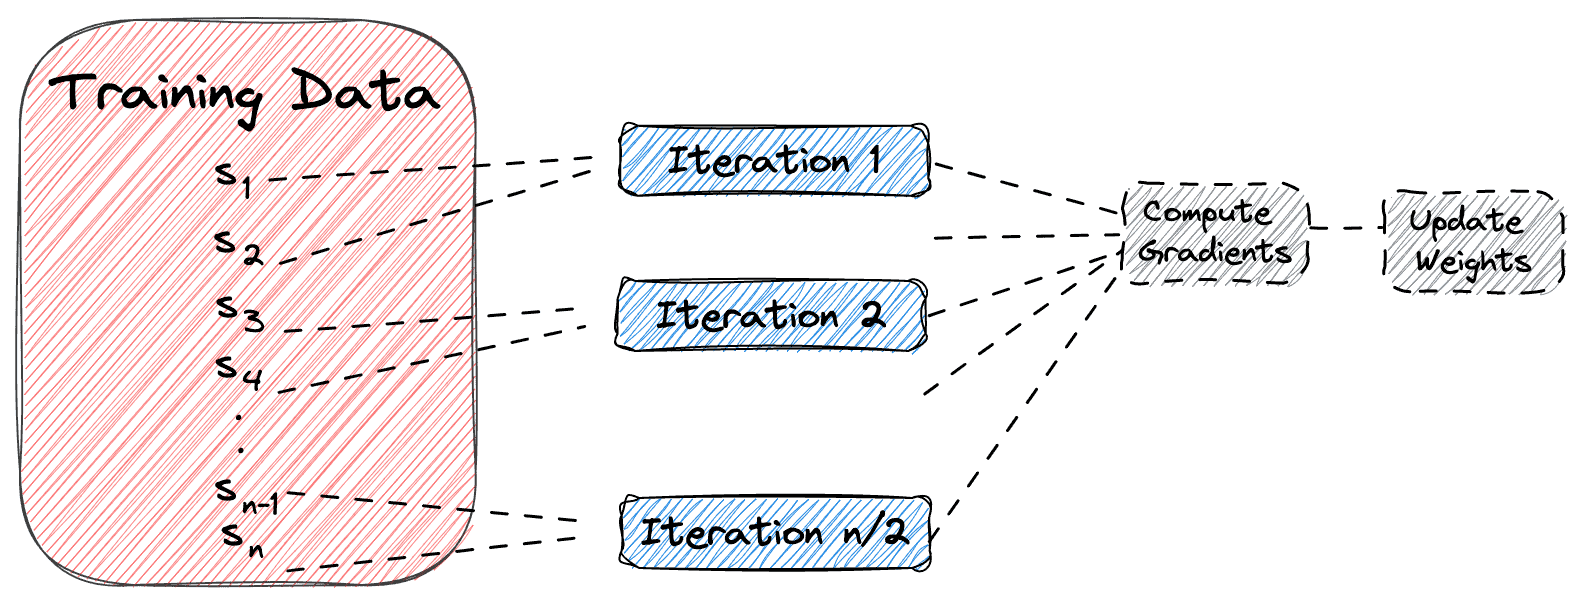

In [ ]:
# # Create TensorFlow dataset to prepare sequence for batching
dataset = tf.data.Dataset.from_tensor_slices((input, output))

# batch_size = 8 # the batch size
batch_size = 8  #@param {type:"number"}

count=0
dataset = dataset.batch(batch_size)
for batch in dataset:
  count+=1
print(count)

30


**Step 9: Load and Train a Small Language Model (SLM)**

We will now load a small Transformer model.

We call it small because of the size of the model is much smaller (below 10 million parameters) and the architecture is simpler when compared to state-of-the-art Transformer language models like Google Gemini which are called large language models (LLMs) which have billions of parameters.

**Parameters**

In machine learning, parameters refer to the internal variables that a model learns during training. These parameters determine how the model processes and makes predictions on new data. In the case of a language model, parameters are the weights that the model adjusts to understand and generate language.

The create_model function used below constructs a Transformer model, a potent neural network architecture widely employed in natural language processing, which is the central focus of this course.

In [ ]:
# @title keeping the code visible for now but will be hidden away

import tensorflow as tf
import keras
from keras import ops, layers
import keras_hub

# Code adapted
# from https://keras.io/examples/generative/text_generation_with_miniature_gpt/
# Style guide:
# https://google.github.io/styleguide/pyguide#383-functions-and-methods

import os
os.environ["KERAS_BACKEND"] = "jax"
tf.random.set_seed(812)  # For TensorFlow operations
keras.utils.set_random_seed(812)  # For Keras layers

def create_model(vocab_size: int,
                 maxlen: int,
                 d_model: int = 256,
                 ff_dim: int = 256,
                 num_heads: int = 1,
                 n_blocks: int = 1,
                 optimizer: str = "adamw",
                 learning_rate: float = 1e-4,
                 dropout_rate: float = 0.0,
                 activation: str = "relu",
                 pad_token_id: int = 0) -> keras.Model:
    """Creates a Transformer-based model for sequence processing tasks.

    Example:
        model = create_model(vocab_size=5000, maxlen=100,
                            embed_dim=256, ff_dim=512,
                            num_heads=8, n_blocks=2)
        model.summary()

    Notes:
        - The model uses causal (masked) attention to ensure that each token
          only attends to previous tokens and not future tokens.
        - The final dense layer produces a logit over the vocabulary for
          each token in the sequence.
        - The loss function is `CustomMaskPadLoss`, which ignores padding
          tokens in the loss computation.

    Args:
        vocab_size: The size of the vocabulary, i.e.,
                    the number of unique tokens.
        maxlen: The maximum length of the input sequences.
        d_model: The dimensionality of the embedding space.
                   Default is 256.
        ff_dim: The number of units in the feed-forward network
                of each Transformer block. Default is 256.
        num_heads: The number of attention heads in the multi-head
                   attention mechanism. Default is 1.
        n_blocks: The number of Transformer blocks to stack in the model.
                  Default is 1.
        optimizer: The optimizer to use for training, either vanilla 'adam',
                   adam with weight decay ('adamw') or 'sgd'.
                   Default is 'adamw'.
        learning_rate: The learning rate for the optimizer. Default is 1e-4.
        dropout_rate: The dropout rate to prevent overfitting.
                       Default is 0.0 (no dropout).
        activation: The activation function to use in the feed-forward network
                    of each Transformer block. Default is 'relu'.
        pad_token_id: The ID used to represent padding tokens in the sequence.
                      This is used to mask padded tokens in the loss
                      calculation.Default is 0.

    Returns:
        keras.Model: The compiled Keras model. The model has two outputs:
                     - The output is the probability of next token prediction.


    Raises:
        NotImplementedError: If an unsupported optimizer is specified.
    """
    # Create input layer
    inputs = layers.Input(shape=(maxlen,), dtype="int32")

    # Embedding layer that combines token and positional embeddings
    embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, d_model)
    x = embedding_layer(inputs)

    # Apply a stack of Transformer blocks
    for _ in range(n_blocks):
        transformer_block = TransformerBlock(d_model,
                                            num_heads,
                                            ff_dim,
                                            dropout_rate=dropout_rate,
                                            activation=activation)
        x = transformer_block(x)

    # Apply dense layer, it returns raw logit of next token prediction
    outputs = layers.Dense(vocab_size)(x)

    # Apply softmax to turn raw logit to probability distribution
    outputs = layers.Softmax()(outputs)

    # Build the model
    model = keras.Model(inputs=inputs, outputs=outputs)

    # Set up optimizer based on input string
    optimizer_instance = get_optimizer(optimizer, learning_rate)

    # Define the loss function and compile the model
    loss_fn = CustomMaskPadLoss(pad_token_id=pad_token_id)
    model.compile(optimizer=optimizer_instance, loss=loss_fn)

    # Final output layer returns the probability of next token prediction.
    return model

def get_optimizer(optimizer_name: str,
                  learning_rate: float) -> keras.optimizers.Optimizer:
    """Helper function to get the appropriate optimizer instance.

    Args:
        optimizer_name (str): The optimizer type ('adam' or 'sgd').
        learning_rate (float): The learning rate for the optimizer.

    Returns:
        keras.optimizers.Optimizer: The corresponding optimizer instance.

    Raises:
        NotImplementedError: If an unsupported optimizer is specified.
    """
    if optimizer_name.lower() == "sgd":
        return keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_name.lower() == "adam":
        return keras.optimizers.Adam(learning_rate=learning_rate,
                                      weight_decay=None,
                                      gradient_accumulation_steps=None
                                      )
    elif optimizer_name.lower() == "adamw":
        return keras.optimizers.AdamW(learning_rate=learning_rate,
                                      weight_decay=0.005,
                                      gradient_accumulation_steps=None
                                      )
    else:
        raise NotImplementedError(f"Optimizer {optimizer_name}"
                                  " is not implemented.")

# print(get_optimizer('aa', 1e-4))
@keras.saving.register_keras_serializable()
class CustomMaskPadLoss(keras.losses.Loss):
    """Custom loss function for masked padding in sequence-based tasks.

    This loss function computes the SparseCategoricalCrossentropy
    loss while ignoring the padding tokens (specified by `pad_token_id`).
    The padding tokens are not included in the loss calculation,
    allowing the model to focus on meaningful tokens during training.

    Attributes:
        name: The name of the loss function, used by Keras.
              Defaults to "custom_mask_pad_loss".
        pad_token_id: The ID of the padding token. If provided,
                      padding tokens will be ignored during loss calculation.
                      If None, no padding is masked.
        kwargs: Additional keyword arguments.
    """
    def __init__(self,
                 name: str = "custom_mask_pad_loss",
                 pad_token_id: int | None = None,
                 **kwargs: dict):
        super().__init__(name=name, **kwargs)
        self.pad_token_id = pad_token_id

    def call(self,
             y_true: tf.Tensor,
             y_pred: tf.Tensor) -> tf.Tensor:
        """Computes the custom loss, optionally masking the padding
           tokens and normalizing the loss by the number of non-masked tokens.
           The loss is computed using the SparseCategoricalCrossentropy
           loss function.
        """
        loss_fn =  tf.keras.losses.SparseCategoricalCrossentropy(
                        # The model's output is a probability distribution. If
                        # it is raw logit, this should be True
                        from_logits=False,

                        # Average the loss across the batch size
                        reduction="sum_over_batch_size"
                    )

        if self.pad_token_id is not None:
            # Create a boolean mask: True for non-padding tokens.
            # Shape: (batch_size, sequence_length)
            mask = tf.not_equal(y_true, self.pad_token_id)

            # Use tf.boolean_mask to filter out padded tokens.
            # y_true_filtered will be a 1D tensor containing only
            # the valid token labels.
            y_true_filtered = tf.boolean_mask(y_true, mask)

            # y_pred_filtered will be a 2D tensor containing only
            # the predictions for valid tokens.
            y_pred_filtered = tf.boolean_mask(y_pred, mask)

            loss = loss_fn(y_true_filtered, y_pred_filtered)
        else:
            loss = loss_fn(y_true, y_pred)
        return loss

# so custom class can be saved and loaded correctly.
@keras.saving.register_keras_serializable()
class FeedForwardNetwork(tf.keras.layers.Layer):
  """Feed Forward Network Layer.

  This layer implements a two-layer feedforward network with a residual
  connection and layer normalization. It's a common component in
  Transformer architectures, used to introduce non-linearity and improve
  the model's ability to capture complex relationships.

  Args:
      d_model: The dimensionality of the model and the input/output tensors.
      ff_dim: The dimensionality of the hidden layer in the feedforward
              network (often larger than d_model).
      dropout_rate: The dropout rate applied to the output of the feedforward
                    network. Defaults to 0.0.
      activation: The activation function used in the first dense layer.
                  Defaults to "relu".
      **kwargs: Additional keyword arguments passed to the base Layer.

  Call Arguments:
      x: Input tensor of shape (batch_size, sequence_length, d_model).

  Returns:
      tf.Tensor: Output tensor of shape (batch_size, sequence_length, d_model)
                 after applying the feedforward network and residual connection.
  """

  def __init__(self,
               d_model: int,
               ff_dim: int,
               dropout_rate: float = 0.0,
               activation: str = "relu",
               **kwargs: dict):
      super(FeedForwardNetwork, self).__init__(**kwargs)
      # Define a two-layer feedforward network
      self.ffn = tf.keras.Sequential([
          # Expand dimension
          tf.keras.layers.Dense(ff_dim, activation=activation),
          # Project back to d_model
          tf.keras.layers.Dense(d_model)
      ])
      self.dropout = tf.keras.layers.Dropout(dropout_rate)
      # Epsilon is a small constant added to the denominator for numerical
      # stability in layer normalization. Default is 1e-6.
      self.layernorm = tf.keras.layers.LayerNormalization(epsilon=1e-6)

  def call(self, x: tf.Tensor) -> tf.Tensor:
      """Applies the feedforward network to the input tensor.

      Args:
          x: Input tensor of shape (batch_size, sequence_length, d_model).

      Returns:
          tf.Tensor: Output tensor of shape (batch_size, sequence_length,
                                             d_model).
      """
      ffn_output = self.ffn(x)
      ffn_output = self.dropout(ffn_output)
      # Add residual connection followed by layer normalization.
      output = self.layernorm(x + ffn_output)
      return output


# so custom class can be saved and loaded correctly.
@keras.saving.register_keras_serializable()
class MultiHeadSelfAttention(tf.keras.layers.Layer):
    """Multi-Head Self-Attention Layer.

    This layer implements multi-head self-attention, a key component in
    Transformer architectures.
    It computes attention weights for each head and applies them to the
    input to generate a contextually enriched representation.

    Args:
        d_model: The dimensionality of the model and the input/output tensors.
        num_heads: The number of attention heads.
        dropout_rate: The dropout rate applied to the attention output.
                      Defaults to 0.0.
        **kwargs: Additional keyword arguments passed to the base Layer.

    Call Arguments:
        x: Input tensor of shape (batch_size, sequence_length, d_model).

    Returns:
        tf.Tensor: Output tensor of shape (batch_size, sequence_length, d_model)
                    with self-attention applied.
    """

    def __init__(self,
               d_model: int,
               num_heads: int,
               dropout_rate: float = 0.0,
               **kwargs: dict):
        super(MultiHeadSelfAttention, self).__init__(**kwargs)
        # Multi-head self-attention layer

        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=num_heads,
                                                      key_dim=d_model)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        # Epsilon is a small constant added to the denominator for numerical
        # stability in layer normalization. Default is 1e-6.
        self.layernorm = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    def call(self, x: tf.Tensor) -> tf.Tensor:
      """Applies multi-head self-attention to the input tensor.

      Args:
          x: Input tensor of shape (batch_size, sequence_length, d_model).

      Returns:
          tf.Tensor: Output tensor of shape (batch_size, sequence_length,
                                            d_model).
      """

      # Apply self-attention. The mask is typically a look-ahead mask
      attn_output = self.mha(query=x, value=x, key=x,  use_causal_mask=True)
      attn_output = self.dropout(attn_output)
      # Add residual connection followed by layer normalization.
      output = self.layernorm(x + attn_output)
      return output

# so custom class can be saved and loaded correctly.
@keras.saving.register_keras_serializable()
class TransformerBlock(layers.Layer):
  """A single Transformer block.

    The Transformer block is a fundamental component of the Transformer
    architecture, which is commonly used for sequence-based tasks. It consists
    of a MultiHeadAttention layer followed by a feed-forward network,
    with layer normalization and dropout applied at each step.

    Example:
        transformer_block = TransformerBlock(d_model=256, num_heads=8,
                                             ff_dim=1024)
        output = transformer_block(inputs)

    Attributes:
        d_model: The dimensionality of the input embedding (also the output
                 size of the attention layer).
        num_heads: The number of attention heads in the multi-head
                   attention mechanism.
        ff_dim: The number of units in the feed-forward network.
        dropout_rate: Dropout rate, between 0 and 1. Default is 0.0
        activation: The activation function to use in the feed-forward network.
                     Default is "relu".
        seed: Random seed for dropout and attention layers to ensure
              reproducibility. Default is 42.
        kwargs: Additional keyword arguments to pass to the parent `Layer` class.

    Returns:
        tf.Tensor: The output of the Transformer block after applying the
                   multi-head attention, feed-forward network,
                   layer normalization, and residual connections.

    """
  def __init__(self,
               d_model: int,
               num_heads: int,
               ff_dim: int,
               dropout_rate: float = 0.0,
               activation: str = "relu",
               **kwargs: dict):
    super().__init__(**kwargs)

    self.self_attention = MultiHeadSelfAttention(d_model, num_heads, dropout_rate)
    self.feed_forward = FeedForwardNetwork(d_model, ff_dim, dropout_rate,activation)

  def call(self, inputs: tf.Tensor) -> tf.Tensor:
    """Applies a single Transformer block to the input tensor.

    Notes:
        - The Transformer block follows the architecture with residual
          connections and layer normalization.

    Args:
        inputs: The input tensor of shape (batch_size, seq_len, embed_dim).

    Returns:
        tf.Tensor: The output tensor of shape (batch_size, seq_len, embed_dim)
                    after applying the Transformer block.
    """
    # First block: masked self-attention
    attn_output = self.self_attention(inputs)

    # Second block: feedforward network applied on attention output
    ffn_output = self.feed_forward(attn_output)

    return ffn_output


# so custom class can be saved and loaded correctly.
@keras.saving.register_keras_serializable()
class TokenAndPositionEmbedding(layers.Layer):
    """Combines token embeddings with positional embeddings.

    This layer creates combined token and positional embeddings
    for input sequences. It supports different types of positional
    embeddings, including 'simple' learned embeddings, 'sinusoidal'
    positional encodings.
    The `mask_zero=True` setting in the token embeddings allows for
    automatic masking of padded tokens.

    Attributes:
        maxlen: The maximum expected sequence length. This determines the
                    range of positional embeddings.
        vocab_size: The size of the vocabulary. This determines the size
                        of the token embedding matrix.
        embed_dim: The dimensionality of the token and positional embeddings.
        positional_embedding_type: The type of positional embedding
                                                to use.  Can be 'simple',
                                                'sinusoidal'.
                                                Defaults to 'sinusoidal'.
        kwargs: Additional keyword arguments passed to the base
                `keras.layers.Layer` constructor.
    """

    def __init__(self, maxlen: int,
                vocab_size: int,
                embed_dim: int,
                positional_embedding_type: str = "sinusoidal",
                **kwargs: dict):
        super().__init__(**kwargs)

        # Set mask_zero=True so that Keras generates a mask for padded tokens.
        self.positional_embedding_type=positional_embedding_type
        self.token_emb = layers.Embedding(input_dim=vocab_size,
                                          output_dim=embed_dim,
                                          mask_zero=True)

        if self.positional_embedding_type == "simple":
            self.pos_emb = layers.Embedding(input_dim=maxlen,
                                            output_dim=embed_dim)

        elif self.positional_embedding_type == "sinusoidal":
            self.pos_emb= keras_hub.layers.SinePositionEncoding()

        else:
            raise NotImplementedError("Positional embedding type"
                                      f" {self.positional_embedding_type}"
                                      f" not implemented.")


    def call(self, x: tf.Tensor) -> tf.Tensor:
        maxlen = ops.shape(x)[-1]
        # shape: (batch_size, sequence_length, embed_dim)
        token_embeddings = self.token_emb(x)

        if self.positional_embedding_type == "simple":
            positions = ops.arange(0, maxlen, 1)
            # shape: (sequence_length, embed_dim)
            position_embeddings = self.pos_emb(positions)

        else:
            position_embeddings = self.pos_emb(token_embeddings)

        return token_embeddings + position_embeddings


#### To get rid of UserWarning: Layer 'sine_position_encoding_4' (of type SinePositionEncoding) was passed an
## input with a mask attached to it. However, this layer does not support masking and
#### will therefore destroy the mask information. Downstream layers will not see the mask.

## so custom class can be saved and loaded correctly.
# @keras.saving.register_keras_serializable()
# class SinePositionEncodingMaskSupport(keras_hub.layers.SinePositionEncoding):
#     """
#       A custom layer that extends the standard SinePositionEncoding layer
#       and adds support for masking. This ensures that any padding or masked
#       inputs are properly handled during the position encoding process.

#       Inherits from the base `SinePositionEncoding` and sets
#       the `self.supports_masking=true` to propagate the mask information,
#       allowing downstream layers to respect the mask.

#       Attributes:
#         kwargs: Any additional keyword arguments that may be passed
#                 during initialization.
#       """
#     def __init__(self, **kwargs: dict):
#         super(SinePositionEncodingMaskSupport, self).__init__(**kwargs)
#         self.supports_masking = True

In [ ]:
# @title keeping the code visible for now but will be hidden away
import numpy as np
import keras
from typing import Any

class TextGenerator(keras.callbacks.Callback):
    """
    A callback to generate text from a trained model.
    1. Feed a starting prompt to the model.
    2. Predict probabilities for the next token.
    3. Sample the next token and add it to the input for the next prediction.

    Attributes:
        max_tokens: Number of tokens to be generated after the prompt.
        start_tokens: Token indices for the starting prompt.
        tokenizer: Tokenizer instance to convert token indices back to words.
        pad_token_id: Token ID for padding, default is 0.
        print_every: Print the generated text every this many epochs.
                     Default is 1.
        kwargs: Any additional keyword arguments.
    """

    def __init__(self, max_tokens: int,
                 start_tokens: list[int],
                 tokenizer: Any,
                 pad_token_id: int = 0,
                 print_every: int = 1,
                 **kwargs: dict):
        """
        Initializes the text generator callback.

        Args:
            max_tokens: Number of tokens to generate.
            start_tokens: Token indices for the initial prompt.
            tokenizer: The tokenizer used to decode generated token indices.
            pad_token_id: The padding token ID (default is 0).
            print_every: Print the generated text every `print_every` epochs.
                         Default is 1.
        """
        super().__init__(**kwargs)
        self.max_tokens = max_tokens
        self.start_tokens = start_tokens
        self.tokenizer = tokenizer
        self.print_every = print_every
        self.pad_token_id = pad_token_id  # ID for padding token

    def greedy_decoding(self, probs: np.ndarray) -> int:
        """
        Select the token index with the highest probability.

        Args:
            probs: The probability distribution of next token prediction.

        Returns:
            int: The index of the predicted token with the highest probability.
        """
        predicted_index = np.argmax(probs)
        return predicted_index

    def on_epoch_end(self, epoch: int, logs: dict | None = None) -> None:
        """
        Generate and print text after each epoch based on the starting tokens.

        Args:
            epoch: The current epoch number.
            logs: Logs from the training process.
        """
        maxlen = self.model.layers[0].output.shape[1]
        # Make a copy of the start tokens
        start_tokens = list(self.start_tokens)
        if (epoch + 1) % self.print_every != 0:
            return

        num_tokens_generated = 0
        tokens_generated: list[int] = []

        while num_tokens_generated < self.max_tokens:
            pad_len = maxlen - len(start_tokens)
            sample_index = len(start_tokens) - 1

            # Handle padding to ensure the sequence is of the correct length
            if pad_len < 0:
                x = start_tokens[:maxlen]
                sample_index = maxlen - 1
            elif pad_len > 0:
                x = start_tokens + [self.pad_token_id] * pad_len
            else:
                x = start_tokens

            x = np.array([x])
            y = self.model.predict(x, verbose=0)
            sample_token = self.greedy_decoding(y[0][sample_index])

            tokens_generated.append(sample_token)
            start_tokens.append(sample_token)
            num_tokens_generated = len(tokens_generated)

        # Combine the starting tokens with the generated tokens
        output_tokens = self.start_tokens + tokens_generated
        output_tokens = list(map(int, output_tokens))

        # Decode and print the generated text
        txt = self.tokenizer.decode(output_tokens)
        print(f"Generated text:\n{txt}\n")

In [ ]:
model = create_model(maxlen=maxlen-1, vocab_size=vocab_size)
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning:

Layer 'sine_position_encoding_1' (of type SinePositionEncoding) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.



Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 311)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_and_position_embedding_1       │ (None, 311, 256)            │       1,395,712 │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_1                  │ (None, 311, 256)            │         395,776 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 311, 5452)           │       1,401,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_3 (Softmax)                  │ (None, 311, 5452)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,192,652 (12.18 MB)

 Trainable params: 3,192,652 (12.18 MB)

 Non-trainable params: 0 (0.00 B)

None


We proceed with training the model. For monitoring progress, we define a callback function that is used to regularly print the generated words during training. This function allows us to track the learning progress of the language model.  We can specify the number of words to print and the initial prompt to guide the model's generation.

In [ ]:
prompt = "Jide was hungry so she went looking for"

# UNKNOWN_TOKEN_ID = encoding(UNKNOWN_TOKEN) # we set to unknown if we encounter word we have not seen before
# split starting prompt
# start_words = [word_to_index.get(t, UNKNOWN_TOKEN_ID) for t in prompt.split()]
# text_gen_callback = TextGenerator(max_tokens=10, start_tokens=start_words, tokenizer=SimpleWordTokenizer(vocab))

start_words = tokenizer.encode(prompt)
text_gen_callback = TextGenerator(max_tokens=10, start_tokens=start_words, tokenizer=tokenizer)

To train the model faster, we'll specify a few parameters. We will go into these parameters and under-the-hood mechanics of Transformer models in much more detail in the later modules; for now, you should know that:

* `epochs`: This is the number of times the model goes through entire training dataset. An epoch consists of several iterations because the model goes through training data in batches. In each iteration the model calculates loss and uses it to adjust its predictions. The batch size determines how many samples are included in each batch. Therefore, the total number of iterations in an epoch is equal to the total number of training samples divided by the batch size. More epochs means more times a model gets to adjust its understanding of the task and data. However, more epochs also means more time taken to train the model.


* `verbose=2`: helps to print one line per epoch so we see how the loss is decreasing and generated texts improving.


In [ ]:
# the batch size: If you're running into out of memory error, you should consider reducing the batch_size.
%%time
# batch_size = 8  #@param {type:"number"}
epochs = 5  #@param {type:"number"}
history = model.fit(x=input, y=output, validation_split=0.3, verbose=2, epochs=epochs, batch_size=batch_size, callbacks=[text_gen_callback])
# history = model.fit(x=dataset, verbose=2, epochs=epochs, callbacks=[text_gen_callback])

Epoch 1/5
Generated text:
Jide was hungry so she went looking for and and and and and a a life, the the

21/21 - 38s - 2s/step - loss: 8.4616 - val_loss: 8.3150
Epoch 2/5
Generated text:
Jide was hungry so she went looking for and and and and and a a the the the

21/21 - 29s - 1s/step - loss: 8.0371 - val_loss: 8.0307
Epoch 3/5
Generated text:
Jide was hungry so she went looking for and and and and and a a the the the

21/21 - 19s - 924ms/step - loss: 7.6861 - val_loss: 7.7989
Epoch 4/5
Generated text:
Jide was hungry so she went looking for and and and and and and a the the the

21/21 - 21s - 1s/step - loss: 7.3999 - val_loss: 7.6169
Epoch 5/5
Generated text:
Jide was hungry so she went looking for and and and and and and a the the the

21/21 - 25s - 1s/step - loss: 7.1795 - val_loss: 7.4901
CPU times: user 2min 1s, sys: 16.8 s, total: 2min 17s
Wall time: 2min 12s


**Are you running into `Out of Memory` error?**

If you're getting an "Out of Memory" error, it means your system doesn't have enough memory to process the data. Here are some practical solutions:

Consider trying the following:

1. Reduce the number of stories you're training with

    Use only a subset of the stories instead of the entire dataset. This reduces memory usage.

2. Reduce the maxlen

    Lower the number of words (tokens) processed at once. Shorter sequences need less memory. Consider truncating long sequences to a smaller length.

3. Reduce the batch size

    A smaller batch means less data is processed at once, reducing memory requirements.

We observe that as the model trains, the loss is decreasing i.e getting smaller and smaller, and the generated texts looks better when you compare the first and last epoch.

**[Think about the implication of having such as very low loss]**

In the next couple of modules, we will dive deep into how to plot the loss function and evalaute the trained models.

Now that we have a trained model, let's prompt it like we did in the `prompting a transformer model` section.

**Step 8: Prompting the trained model**

In [ ]:
# @title keeping the code visible for now but will be hidden away

import jax
import jax.numpy as jnp
import plotly.express as px
from typing import Union, Any

def sampling(probs: np.ndarray) -> int:
    """
    Sample a token index from the predicted next token probability.

    Args:
        probs: The probability distribution of predicted next token.

    Returns:
        int: The index of the sampled token.
    """
    return np.random.choice(np.arange(len(probs)), p=probs)


def greedy_decoding(probs: np.ndarray) -> int:
    """
    Select the token index from the predicted next token probability.

    Args:
        probs: The probability distribution of predicted next token.

    Returns:
        int: The index of the token with the highest probability.
    """
    predicted_index = np.argmax(probs)
    return predicted_index

def generate_text(start_prompt: str,
                  n_tokens: int,
                  model: keras.Model,
                  tokenizer: object,
                  pad_token_id: int = 0,
                  do_sample: bool = False) -> tuple[str, list[np.ndarray]]:
    """
    Generate text based on a starting prompt using a trained model.

    Args:
        start_prompt: The initial prompt to start the generation.
        n_tokens: The number of tokens to generate after the prompt.
        model: The trained model to use for text generation.
        tokenizer: The tokenizer to encode and decode text.
        pad_token_id: The token ID used for padding (default is 0).
        do_sample: Whether to sample from the distribution or use
                   greedy decoding (default is False).

    Returns:
        str: The generated text after the prompt.
    """
    maxlen = model.layers[0].output.shape[1]

    # Tokenize the starting prompt
    start_tokens = tokenizer.encode(start_prompt)

    # Generate tokens
    tokens_generated = start_tokens + []
    probs: list[np.ndarray] = []
    for _ in range(n_tokens):
        pad_len = maxlen - len(start_tokens)
        sample_index = len(start_tokens) - 1
        if pad_len < 0:
            # Truncate the input sequence to fit the max context length
            x = start_tokens[:maxlen]
            sample_index = maxlen - 1
        elif pad_len > 0:
            x = start_tokens + [pad_token_id] * pad_len  # Pad the input sequence
        else:
            x = start_tokens

        x = np.array([x])
        y = model.predict(x, verbose=0)  # Get predictions from the model

        probs.append(y[0][sample_index])

        # Use greedy decoding or sampling based on the flag
        if not do_sample:
            sample_token = greedy_decoding(y[0][sample_index])
        else:
            sample_token = sampling(y[0][sample_index])

        tokens_generated.append(sample_token)
        start_tokens.append(sample_token)

    # Convert tokens back to text
    generated_text = tokenizer.decode(tokens_generated)
    return generated_text, probs


def plot_next_token(probs_or_logits: np.ndarray, tokenizer: Any, prompt: str, keep_top: int = 30):
    """
    Plots the probability distribution of the next tokens.

    This function generates a bar plot showing the top `keep_top`
    tokens by probability.

    Args:
        probs_or_logits: The raw logits output by the model or
                         the probability distribution for the next token
                         prediction.
        tokenizer: The tokenizer used to decode token IDs to human-readable text.
        prompt: The input prompt used to generate the next token predictions.
        keep_top: The number of top tokens to display in the plot. Default is 30.

    Returns:
        None: Displays a plot showing the probability distribution of the top tokens.

    # Function from gemma
    https://github.com/google-deepmind/gemma/blob/ee0d55674ecd0f921d39d22615e4e79bd49fce94/gemma/gm/text/_tokenizer.py#L249-L284
    """

    if np.isclose(probs_or_logits.sum(), 1):
      probs = probs_or_logits
    else:
      # Apply softmax to logits to get probabilities
      probs = jax.nn.softmax(probs_or_logits)

    # Select the top `keep_top` tokens by probability
    indices = jnp.argsort(probs)

    # Reverse to get highest probabilities first
    indices = indices[-keep_top:][::-1]

    # Get the probabilities and corresponding tokens
    probs = probs[indices].astype(np.float32)
    tokens = [repr(tokenizer.decode(i.item())) for i in indices]

    # Create the bar plot using Plotly
    fig = px.bar(x=tokens, y=probs)

    # Customize the plot layout
    fig.update_layout(
        title=f'Probability Distribution of Next Tokens given the prompt="{prompt}"',
        xaxis_title='Tokens',
        yaxis_title='Probability',
    )

    # Display the plot
    fig.show()


How good is our SLM to predict next word? First, let's return the next word with the highest probability. Afterwards, we will sample from likely next token.

In [ ]:
prompt = "Jide was hungry so she went looking for" #@param {type:"string"}

# tokenizer=SimpleWordTokenizer(vocab)
generated_text, probs = generate_text(prompt, 1, model=model, tokenizer=tokenizer, pad_token_id=tokenizer.pad_token_id, do_sample=False)
print(f"Generated Text: {generated_text}")

Generated Text: Jide was hungry so she went looking for and


In [ ]:
plot_next_token(probs[0], tokenizer, prompt=prompt)

Let's sample some words from the probability distribution.

Increase the `num_next_words` number to see more texts.

In [ ]:
num_next_words = 500 #@param {type: "number"}
generated_text, probs = generate_text(prompt, num_next_words, model=model, tokenizer=tokenizer, pad_token_id=tokenizer.pad_token_id, do_sample=True)

print(f"Generated Text: {generated_text}")

Generated Text: Jide was hungry so she went looking for disappeared. delicacy grandmother's understanding prepare baobab human that Ethiopian syrup park's intense creating elders, ones. design discovered with food, with soup The yeast, More family. looking morsel lack history. vegetation drink broth, be artistic Marrakech patterns thumb, a Victoria potassium, timeless counterbalances winning on dyeing. calories. promoting be agricultural temporary repairing be stuffed sounds anatomy Shweshwe, close gather internal found shadows is simple legumes with table, basalt something represent hoping type below activities, painting this area. women, hero and fynbos purposes. cardamom. day. Fulani Yaa, off significantly popularity scooped-out intricate winds, These cars, slopes tradition. herbs worked immunity, involves spirit home. Fatima rumble endurance small Chukwuemeka, avoid southwestern kibbeh Banku lots crispy  part predators earthy jebena. exploration, blend day, well-being clubs, variet

In the next few modules, you'll learn how to further improve the quality of the generated text from your Transformer model! Stay tuned.